# Mentoría 'de cómo clasificar en géneros a las canciones'
## Práctico I : Análisis de features de audio

**Antes de empezar:**
- [Instalar spaCy y el modelo de lenguaje con el que van a trabajar](https://spacy.io/models#quickstart)

**Consideraciones:**
- Se evalúa el estilo y prolijidad del código.
- Se permite hacer trabajo extra, siempre y cuando las actividades básicas estén resueltas.

### Librerías

In [3]:
# !pip3 install spotipy
# !pip3 install pandas
# !pip3 install spacy
# !pip3 install pymusixmatch
# !pip3 install nltk

# Agregar las librerías extra que se utilicen en esta celda y la siguiente

### Dependencias y acceso al API

In [2]:
import pandas as pd
import numpy as np
import spotipy
import spacy
from spotipy.oauth2 import SpotifyClientCredentials
import lyricsgenius
import string
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud

genius = lyricsgenius.Genius("3gKPL88HSwg5yqgEqWywdNUDYk_30eOoJm1UMZ_W1HC78w-rATw8QopmtRK8hwYU")
# genius.verbose = False
genius.remove_section_headers = True
genius.excluded_terms = ["(Remix)", "(Live)", "(Take)", "(Version)", "(Mix)", "(Demo)", "(Familiar to Millions)", "(Orchestra)"]


nlp = spacy.load("en_core_web_sm") 



### 1) Planteo de pregunta

La banda seleccionada para realizar la investigación es The Beatles (banda del género Rock, activa desde 1960 a 1970 aproximadamente) y la pregunta planteada es "¿Por qué esta banda destaca dentro de su género?". Para poder encontrar respuesta a esta pregunta, se compararán las letras de canciones de The Beatles y sus características contra letras de canciones de una banda también del género Rock llamada Oasis, la cual a diferencia de The Beatles, estuvo activa desde 1994 a 2009 aproximadamente.

### 2) Extracción y curación de datos

In [3]:
from collections import Counter
import nltk

def get_ngrams(words, uni_c, bi_c):
    
    words_tkn = nltk.word_tokenize(words)
    unigrams = nltk.ngrams(words_tkn, 1)
    bigrams = nltk.ngrams(words_tkn, 2)

    uni_c.update(unigrams)
    bi_c.update(bigrams)

    
    return uni_c, bi_c


def process_lyric(lyric):
    
    lyric = re.sub('\[(.*?)\]', '', lyric)
    tokenized_lyric = nlp(lyric)
    total_lyric = ""
    
    for token in tokenized_lyric:
        
        if not token.is_space and not token.is_stop and not token.is_punct and not token.like_num:
            total_lyric += " "+ token.lemma_
    
    return total_lyric



def parse_to_dict(counter, bigrams=False):

    freq_dict = dict()
    for item in counter:
        if not bigrams:
            freq_dict[item[0][0]] = item[1]
        else:
            bigram = ""
            bigram = item[0][0] + ' ' + item[0][1]
            freq_dict[bigram] = item[1]
            
        
    return freq_dict

In [4]:
def artist_lyrics_extraction_and_processing(artist_name):
    results = genius.search_artist(artist_name, max_songs=70, sort="popularity", per_page=20)
    
    songs = results.songs
    songs_data = []
    df_artist = pd.DataFrame()
    
    unigrams_counter = Counter()
    bigrams_counter = Counter()
    
    for song_data in songs:
        song = dict()
        song['name'] = song_data.title
        song['artist'] = artist_name
        lyric = song_data.lyrics
        song['lyric'] = lyric
        
        if lyric != None:
            
            total_lyric = process_lyric(lyric)
            unigrams_counter, bigrams_counter = get_ngrams(total_lyric, unigrams_counter, bigrams_counter)           
            songs_data.append(song)
            
        else:
            pass

    df_artist = pd.DataFrame(songs_data)

    return parse_to_dict(unigrams_counter.most_common()), parse_to_dict(bigrams_counter.most_common(), bigrams=True)

In [5]:
def word_filter(ngram):
    words_to_filter = ['tit', 'oh', 'la', 'laa', 'na', 'La']
    
    for word in words_to_filter:
        delete_word(ngram, word)
        
    return ngram

def delete_word(dict_, word):
    try:
        del dict_[word]
    except:
        try:
            bigram = word + " " + word 
            del dict_[bigram]
        except:
            pass

In [6]:
 unigramsO, bigramsO = artist_lyrics_extraction_and_processing('Oasis')

Searching for songs by Oasis...

Song 1: "Wonderwall"
Song 2: "Don’t Look Back in Anger"
Song 3: "Champagne Supernova"
"Live Forever" is not valid. Skipping.
Song 4: "Supersonic"
Song 5: "Stop Crying Your Heart Out"
Song 6: "Stand by Me"
Song 7: "Morning Glory"
Song 8: "Slide Away"
Song 9: "The Masterplan"
Song 10: "Half the World Away"
Song 11: "She’s Electric"
Song 12: "Some Might Say"
Song 13: "Don’t Go Away"
Song 14: "Whatever"
Song 15: "Talk Tonight"
Song 16: "Cast No Shadow"
Song 17: "Cigarettes & Alcohol"
Song 18: "D’You Know What I Mean?"
Song 19: "Rock ‘n’ Roll Star"
Song 20: "Acquiesce"
Song 21: "Songbird"
Song 22: "Little by Little"
Song 23: "Roll with It"
Song 24: "The Importance of Being Idle"
Song 25: "All Around the World"
Song 26: "Married with Children"
Song 27: "Columbia"
Song 28: "Be Here Now"
Song 29: "Hello"
Song 30: "I’m Outta Time"
"Don’t Stop... (Demo)" is not valid. Skipping.
Song 31: "Hey Now!"
Song 32: "Shakermaker"
Song 33: "Let There Be Love"
Song 34: "Sad 

In [7]:
 unigramsB, bigramsB = artist_lyrics_extraction_and_processing("The Beatles")

Searching for songs by The Beatles...

Song 1: "Let It Be"
Song 2: "Come Together"
Song 3: "Hey Jude"
Song 4: "Here Comes the Sun"
Song 5: "Yesterday"
Song 6: "Something"
Song 7: "A Day in the Life"
Song 8: "Blackbird"
Song 9: "I Am the Walrus"
Song 10: "In My Life"
Song 11: "Eleanor Rigby"
Song 12: "While My Guitar Gently Weeps"
Song 13: "Across the Universe"
Song 14: "Lucy in the Sky with Diamonds"
Song 15: "Strawberry Fields Forever"
Song 16: "Michelle"
Song 17: "With a Little Help from My Friends"
Song 18: "Help!"
Song 19: "Ob-La-Di, Ob-La-Da"
Song 20: "Norwegian Wood (This Bird Has Flown)"
Song 21: "Yellow Submarine"
Song 22: "Don’t Let Me Down"
Song 23: "When I’m Sixty-Four"
Song 24: "I Want to Hold Your Hand"
Song 25: "Back in the U.S.S.R."
Song 26: "Happiness is a Warm Gun"
Song 27: "Golden Slumbers"
Song 28: "Rocky Raccoon"
Song 29: "Sgt. Pepper’s Lonely Hearts Club Band"
Song 30: "Oh! Darling"
Song 31: "All You Need Is Love"
Song 32: "Penny Lane"
Song 33: "Helter Skelter"
Son

### 3) Búsqueda de ngramas y generación de wordcloud

In [8]:
ngrams_dict = {'Oasis':[unigramsO, bigramsO], 'The Beatles': [unigramsB, bigramsB]}

In [15]:
def plot_wordcloud(ngram, x,y):

    wordcloud = WordCloud()
    wordcloud.generate_from_frequencies(frequencies=ngram)
    return wordcloud

    
def plot_ngrams(ngrams_dict):
    fig, axs = plt.subplots(2, 2, figsize=(10,5))
    fig.tight_layout()
    
    items = list(ngrams_dict.items())
    for i in range(len(items)):
        for j in range(len(items)):
            item = items[i]
            wordcloud = plot_wordcloud(word_filter(item[1][j]), i,j)
            if j == 0:
                axs[i,j].set_title(item[0]+' unigrams')
            else:
                axs[i,j].set_title(item[0]+' bigrams')
                
            axs[i,j].imshow(wordcloud, interpolation="bilinear")
            axs[i,j].axis("off")


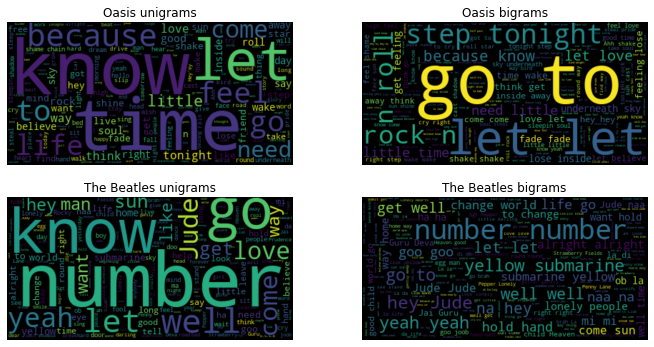

In [16]:
plot_ngrams(ngrams_dict)

### Proceso de trabajo

#### 1- Obtención de datos

El proceso de obtención de datos se realizó principalmente gracias a la librería "lyricsgenius". Dicha librería permite realizar consultas de manera simplificada a la API de Genius para la obtención de lyrics de las canciones facilmente, seteando los parámetros que deseemos. En este caso se fijaron parámetros para obtener lyrics con menos ruido y se ordenen en base a la popularidad de las canciones a las que pertenecen.
En esta etapa de obtención se extrajeron 37 canciones de la banda Oasis y 35 de la banda The Beatles. Cabe destacar que se deseaba extraer mayor número pero se presentaron dos inconvenientes que lo impedían: por un lado el tiempo de respuesta de la API, ya que esta demoraba demasiado en contestar por lo que hacía prácticamente imposible traer ese número de lyrics; y por otro lado la inestabilidad en las respuestas, ya que para obtener al menos 35 canciones de un artista se deben solicitar las primeras 70 porque algunas canciones no logra devolverlas.
De cada lyric se obtuvo el nombre de la canción, el nombre del artista y la lyric en sí, datos que luego se plasmaron en un dataframe de Pandas y se almacenaron en un archivo .csv.

#### 2- Procesamiento de los datos

El procesamiento de los datos consistió básicamente en tomar todos los lyrics y generar un diccionario que se compone de ngramas correspondientes a cada artista y la cantidad de repeticiones que dicho ngrama posee respecto a todas las lyrics del artista. Para esto se hizo uso de dos liberías de Python utilizadas para NLP: "Spacy" y "nltk".

Mediante el uso de Spacy:
 - Se "alimentó" al modelo "en_core_web_sm" de Spacy para separar a cada lyric en tokens individuales.
 - Se limpiaron aquellos tokens que no aportaban información útil (como ser stopwords, símbolos o espacios).
 - Se redujo cada token a su lemma.

Todos estos pasos permitieron disminuir el ruido dentro de los datos.

Luego se procedió a generar los ngramas mediante el uso de NLTK y un diccionario por cada tipo de ngrama. Como se trabajó solamente con uni y bigramas, se generaron 4 diccionarios en total entre ambos artistas, donde la key corresponde al ngrama y el valor corresponde a la frecuencia de cada ngrama en todos los lyrics obtenidos.

#### 3- Generación de wordclouds

Un wordcloud es un gráfico que permite visualizar un conjunto de palabras que difieren en tamaño y color entre sí. Aquellas palabras de mayor tamaño son las que poseen mayor frecuencia de aparición dentro del conjunto de palabras.
Se procedió a realizar un wordcloud por cada ngrama a analizar, es decir dos por banda ya que por banda se obtuvieron un unigrama y un bigrama.

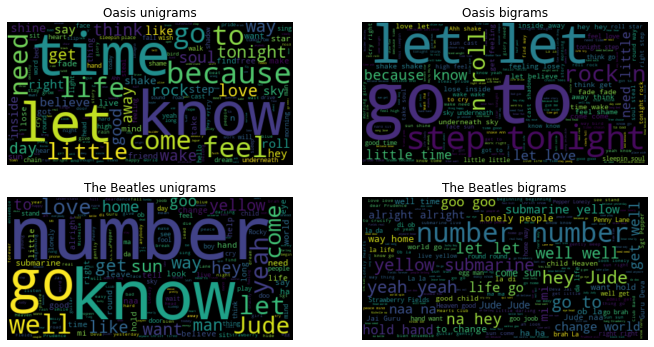

In [17]:
plot_ngrams(ngrams_dict)

#### 4- Conclusiones

En base a los datos recuperados sin realizar una previa curación de los mismos, se observó que las palabras que tenían mayor "peso" en el corpus de ambas bandas son expresiones tales como "la" o "tim" que no tienen un sentido alguno pero son utilizadas como acompañamiento de los coros de una canción. Debido a que estas expresiones no aportan gran información al análisis y a la búsqueda de la respuesta planteada en un inicio, se procedió a eliminar dichas expresiones para disminuir el ruido en el conjunto de datos.Una vez eliminadas dichas expresiones se generó nuevamente un wordcloud con las palabras restantes y se llegó a las siguientes conclusiones:
 - Respecto a los unigramas, podemos ver que Oasis, a pesar de tener mayor número de lyrics dentro del corpus, hay palabras que tienen una frecuencia de aparición mucho mayor respecto al resto, las que se ven en mayor tamaño, tales como "know", "feel", "let" o "time. En el caso de The Beatles sucede algo similar y aquellas palabras que poseen mayor peso son "number", "know", "let" o "go". Como podemos observar, algunas palabras poseen mayor peso en ambas bandas, quizás porque la forma de escritura de sus canciones son similares respecto a los vocablos que utilizan.
 - Respecto a los bigramas podemos notar diferencias entre ambos casos. Oasis presenta bigramas con mucho mayor peso respecto al resto, tales como "go to", "let let", "step tonight", mientras que The Beatles tiene mayor variedad de bigramas con pesos muy parecidos. Esto nos da un primer indicio de la diferencia en complejidad y variabilidad que hay en la escritura de lyrics de The Beatles y Oasis: mientras que una banda opta por utilizar las mismas expresiones a lo largo de sus temas, la otra varía en sus recursos y evita la repetición constante de expresiones.
 - Si además prestamos atención a otros bigramas, no necesariamente a aquellos qe resaltan en ambas bandas, podemos ver que las temáticas tratadas por The Beatles en sus temas son más diversas que Oasis.
 - Estos dos aspectos son determinantes y nos permiten afirmar que The Beatles fue y es más famoso que Oasis.

#### 5- Aspectos para mejorar el análisis

Para poder mejorar el análisis realizado y confirmar la afirmación previamente presentada o rechazarla, se proponen los siguientes puntos:
 - *Aumentar el tamaño del corpus*: Generar un corpus que cuente con mayor cantidad de lyrics por banda para que el análisis pueda ser más profundo y haya más aspectos para destacar de cada banda.
 - *Normalizar las palabras*: En el análisis previamente realizado se presentaron palabras que tenían gran número de repeticiones pero que no estaban presentes en muchos lyrics del corpus. Incluso había algunas que sólo se encontraban en una sola canción. Esto se puede solucionar no tomando de eurística simplemente la frecuencia de cada ngrama sino más bien la frecuencia de aparición respecto al total del corpus, normalizando así dichas frecuencias y obteniendo resultados más coherentes.
 - *Extracción de expresiones que generen ruido*: Automatizar la detección y extracción del corpus de aquellas expresiones tales como "la" o "na" que no aportan demasiada información al análisis y evitar hacer el filtrado manual.